Importing all necesarry libraries

In [48]:

import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split   #used to split data in training and testing

from sklearn.tree import DecisionTreeClassifier          # models used in this project
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [50]:
data = pd.read_csv("collegePlace.csv")
data.head(10)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
5,22,Male,Electronics And Communication,0,6,0,0,0
6,21,Male,Computer Science,0,7,0,1,0
7,21,Male,Information Technology,1,7,0,0,0
8,21,Male,Computer Science,2,6,0,0,1
9,21,Female,Computer Science,1,6,1,0,0


In [51]:
null_values = data.isnull().sum() 
print(null_values)

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64


<Axes: ylabel='CGPA'>

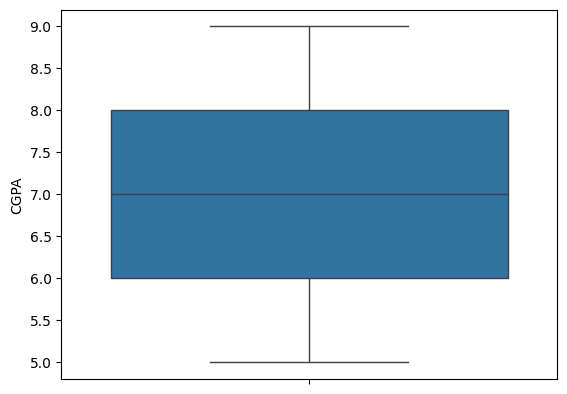

In [52]:
sns.boxplot(data['CGPA'])

In [53]:
data["Gender"] = data["Gender"].map({"Male": 0, "Female": 1})
data["Stream"] = data["Stream"].map({"Electronics And Communication": 0, "Computer Science": 1, "Information Technology": 2, "Mechanical": 3, "Electrical": 4, "Civil": 5})

In [54]:
data.head()   # now all the data is in the form of numbers and thus can be used for training

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,0,1,8,1,1,1
1,21,1,1,0,7,1,1,1
2,22,1,2,1,6,0,0,1
3,21,0,2,0,8,0,1,1
4,22,0,3,0,8,1,0,1


In [55]:
Y = data["PlacedOrNot"]
X = data.drop(["PlacedOrNot"],axis=1)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [57]:
#obj = RandomForestClassifier(n_estimators=100, random_state=42)
#obj.fit(X_train, y_train)                                             #RF -> 87.74% accuracy

In [58]:
obj = DecisionTreeClassifier()
obj.fit(X_train,y_train)                                               # DT -> 88.45 accuracy


DecisionTreeClassifier()

In [59]:
#obj = SVC(kernel='linear', random_state=42)
#obj.fit(X_train, y_train)
#svm_y_pred = svm_model.predict(X_test)
#svm_accuracy = accuracy_score(y_test, svm_y_pred)
                                                                            # SVM -> 74.66% accuracy

In [60]:
y_pred = obj.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

Accuracy: 89.23%
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       280
           1       0.95      0.84      0.89       314

    accuracy                           0.89       594
   macro avg       0.90      0.90      0.89       594
weighted avg       0.90      0.89      0.89       594



In [ ]:
age = int(input("Enter Age: "))
gender = int(input("Enter Gender (0 for Male, 1 for Female): "))
stream = int(input("Enter Stream (0 for Electronics And Communication, 1 for Computer Science, 2 for Information Technology, 3 for Mechanical, 4 for Electrical, 5 for Civil): "))
internships = int(input("Internships done?: "))
cgpa = float(input("Enter CGPA: "))
hostel = int(input("Enter Hostel (0 for No, 1 for Yes): "))
history_of_backlogs = int(input("Enter History of Backlogs (0 for No, 1 for Yes): "))

new_data = pd.DataFrame({
    "Age": [age],
    "Gender": [gender],
    "Stream": [stream], 
    "Internships": [internships],
    "CGPA": [cgpa],
    "Hostel": [hostel],
    "HistoryOfBacklogs": [history_of_backlogs]
})

prediction = obj.predict(new_data)
print("----------------------------------")
if(prediction==1):
    print("You are getting placed! Keep the work up")
else:
    print("You still need to work harder!")
print("----------------------------------")

Enter Age:  21
